# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'> Os incêndios florestais são eventos catastróficos que impactam o meio ambiente, a economia e a sociedade. A previsão destes incêndios é importante para reduzir perdas e permite que as autoridades tomem medidas preventivas, como o controle de incêndios e o reforço das equipes de combate a incêndios.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é prever a área queimada de incêndios florestais, na região nordeste de Portugal, por meio de dados metereológicos e outros.</p>

#### __Fonte dos dados__: https://archive.ics.uci.edu/dataset/162/forest+fires

### Dados:
<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>X</b> - Coordenada espacial do eixo x dentro do mapa do parque de Montesinho: 1 a 9</li>
    <li><b>Y</b> - Coordenada espacial do eixo y dentro do mapa do parque de Montesinho: 2 a 9</li>
    <li><b>moth</b> - mês do ano: 'Jan' a 'Dec' </li>
    <li><b>day</b> - Dia da semana: 'Mon' a 'Sun' </li>
    <li><b>FFMC</b> - Índice FFMC do sistema FWI: 18.7 a 96.2 </li>
    <li><b>DMC</b> - Índice DMC do sistema FWI: 1.1 a 291.3 </li>
    <li><b>DC</b> - Índice DC do sistema FWI: 7.9 a 860.6 </li>
    <li><b>ISI</b> - Índice ISI do sistema FWI: 0.0 a 56.10 </li>
    <li><b>temp</b> - Temperatura em graus Celsius: 2.2 a 33.30 </li>
    <li><b>RH</b> - Umidade relativa em %: 15,0 a 100</li>
    <li><b>wind</b> - Velocidade do vento em km/h: 0.40 a 9.40</li>
    <li><b>rain</b> - Chuva externa em mm/m²: 0.0 a 6.4</li>
    <li><b>area </b> - Área queimada da floresta (em ha): 0.00 a 1090.84</li>
</ul>



### Um pouco sobre o sistema FWI:
<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O sistema FWI (Fire Weather Index) é um modelo usado para avaliar o risco de incêndios florestais com base em variáveis meteorológicas. Desenvolvido inicialmente no Canadá, o FWI é amplamente utilizado em todo o mundo para prever o potencial de incêndios florestais.</p>

### Componentes do Sistema FWI:
<p style = 'font-size: 15px; line-height:2; margin: 10px 50px; text-align: justify; text-indent: 35px;'> 
   O sistema FWI é composto por vários índices que avaliam diferentes aspectos da vegetação e das condições climáticas. Esses índices são:</p>
</ul>
 <ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>FFMC (Fine Fuel Moisture Code)</b> - Mede a umidade de combustíveis finos, como folhas e pequenos galhos. Quanto menor a umidade, maior o risco de incêndio.</li>
    <li><b>DMC (Duff Moisture Code):</b> - Avalia a umidade em camadas intermediárias de matéria orgânica, como musgos e folhas em decomposição. Este índice é importante para incêndios que podem queimar em profundidade.</li>
    <li><b>DC (Drought Code)</b> - Mede a seca em camadas profundas do solo e em grandes troncos de madeira. Um alto valor de DC indica condições muito secas e um risco elevado de incêndios duradouros e profundos. </li>
    <li><b>ISI (Initial Spread Index)</b> - Estima a rapidez com que um incêndio pode se espalhar após a ignição, considerando o vento e a secura dos combustíveis. </li>
    <li><b>BUI (Buildup Index)</b> - Combina os valores do DMC e do DC para estimar a quantidade de combustível disponível para a queima. </li>
    <li><b>FWI (Fire Weather Index)</b> - É o índice final que combina todos os componentes anteriores para fornecer uma medida geral da intensidade do fogo. Um FWI alto indica um risco significativo de incêndio. </li>
</ul>

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dados = pd.read_csv('forestfires.csv')

In [3]:
dados.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
dados.shape

(517, 13)

Verificando se existem dados duplicados

In [6]:
dados.duplicated().sum()

4

Removendo esses dados:

In [7]:
dados.drop_duplicates(inplace = True)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [8]:
dados.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,4.678363,4.300195,90.637427,110.989279,549.155166,9.023587,18.887524,44.348928,4.010526,0.021832,12.891598
std,2.320059,1.230925,5.540920,64.191013,247.724594,4.575543,5.828128,16.358803,1.796613,0.297107,63.892586
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,440.900000,6.400000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.540000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [9]:
dados.describe(include = ['object'])

,month,day
count,513,513
unique,12,7
top,aug,sun
freq,182,94


## Análises gráficas das variáveis independentes

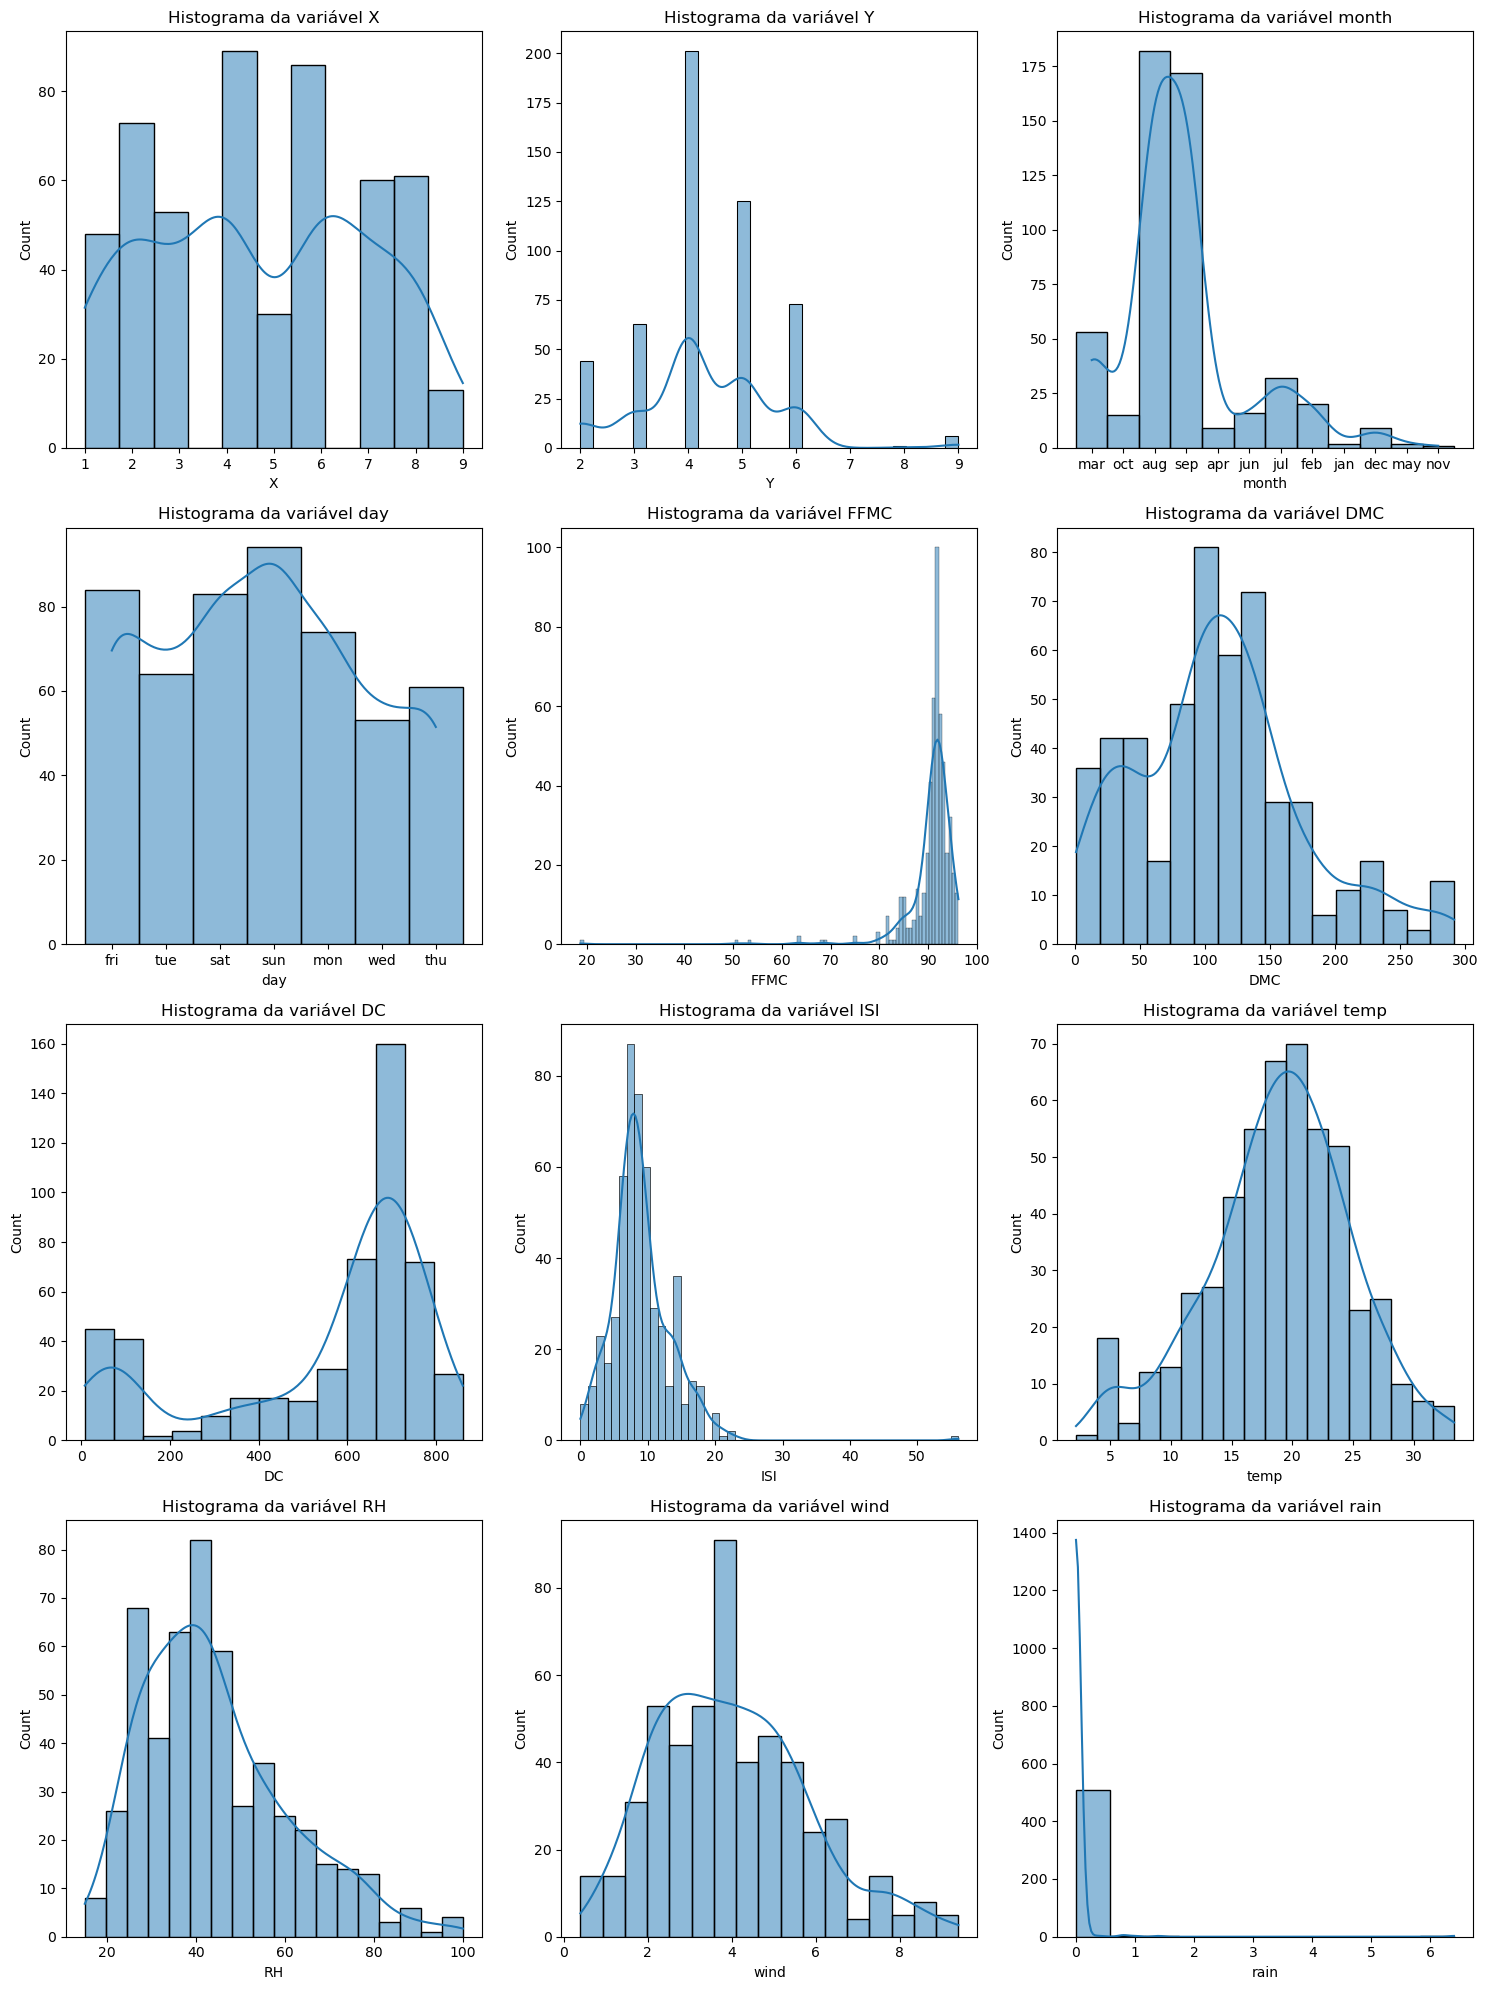

In [10]:
fig, axs =  plt.subplots(nrows = 4, ncols = 3, figsize=(15,20))
axs = np.ravel(axs)

colunas = dados.columns[:12]

for i, col in enumerate(colunas):
    plt.sca(axs[i])
    sns.histplot(data = dados, x = col, kde = True)
    plt.title(f'Histograma da variável {col}')
    
plt.tight_layout() 
plt.show()

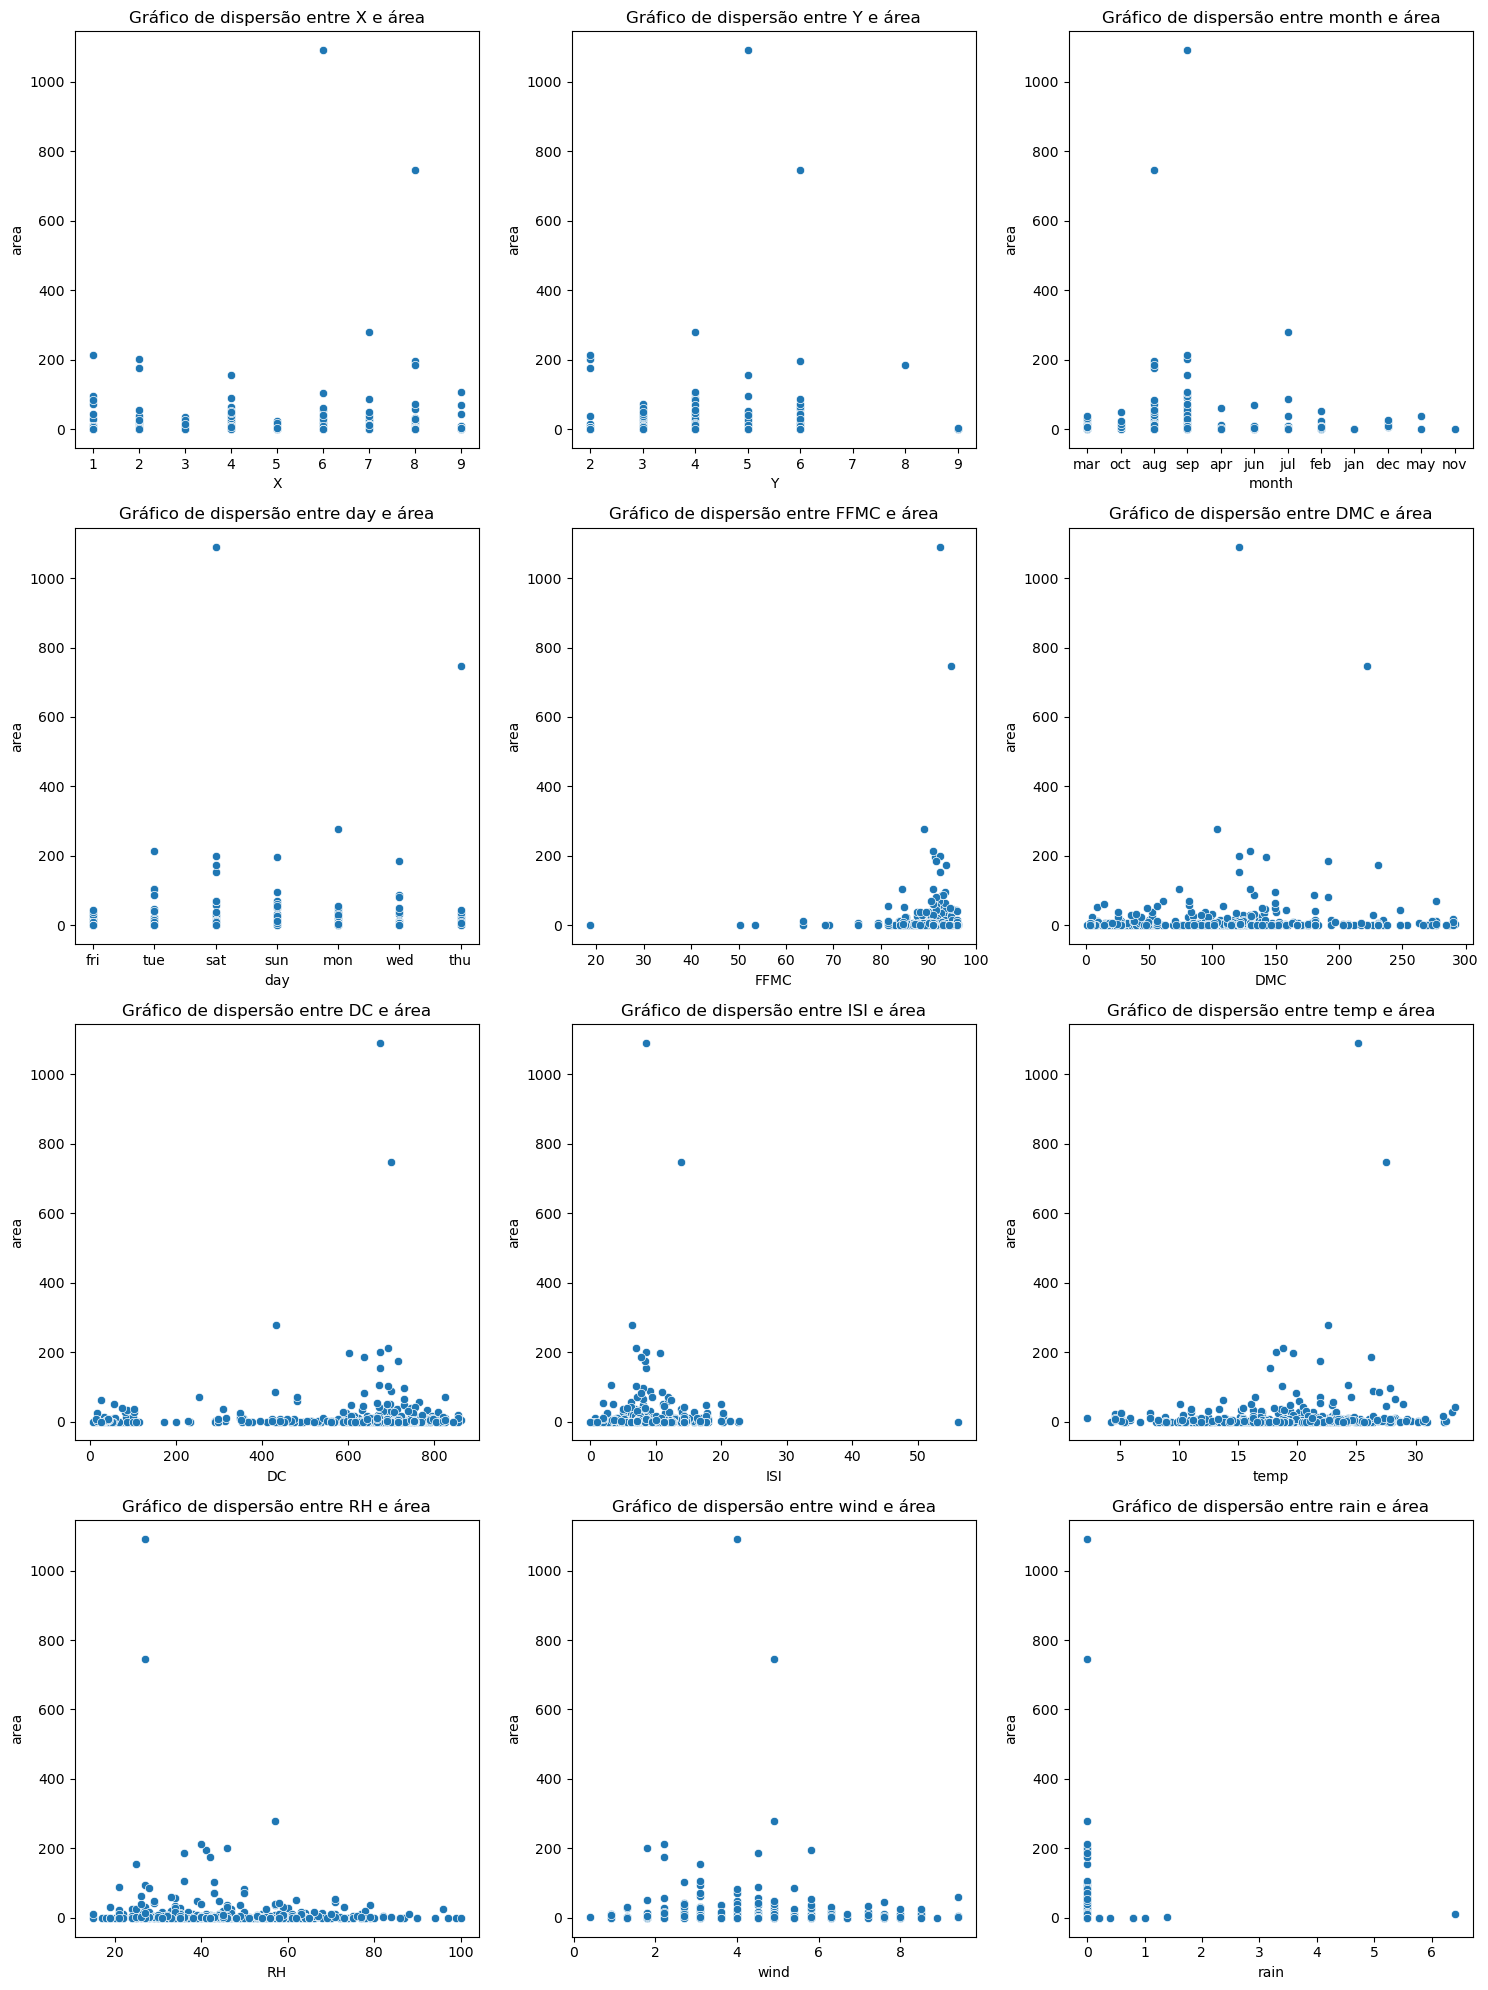

In [11]:
fig, axs =  plt.subplots(nrows = 4, ncols = 3, figsize=(15,20))
axs = np.ravel(axs)

colunas = dados.columns[:12]

for i, col in enumerate(colunas):
    plt.sca(axs[i])
    sns.scatterplot(data = dados, x = col, y = 'area')
    plt.title(f'Gráfico de dispersão entre {col} e área')
    
plt.tight_layout() 
plt.show()

In [12]:
dados.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

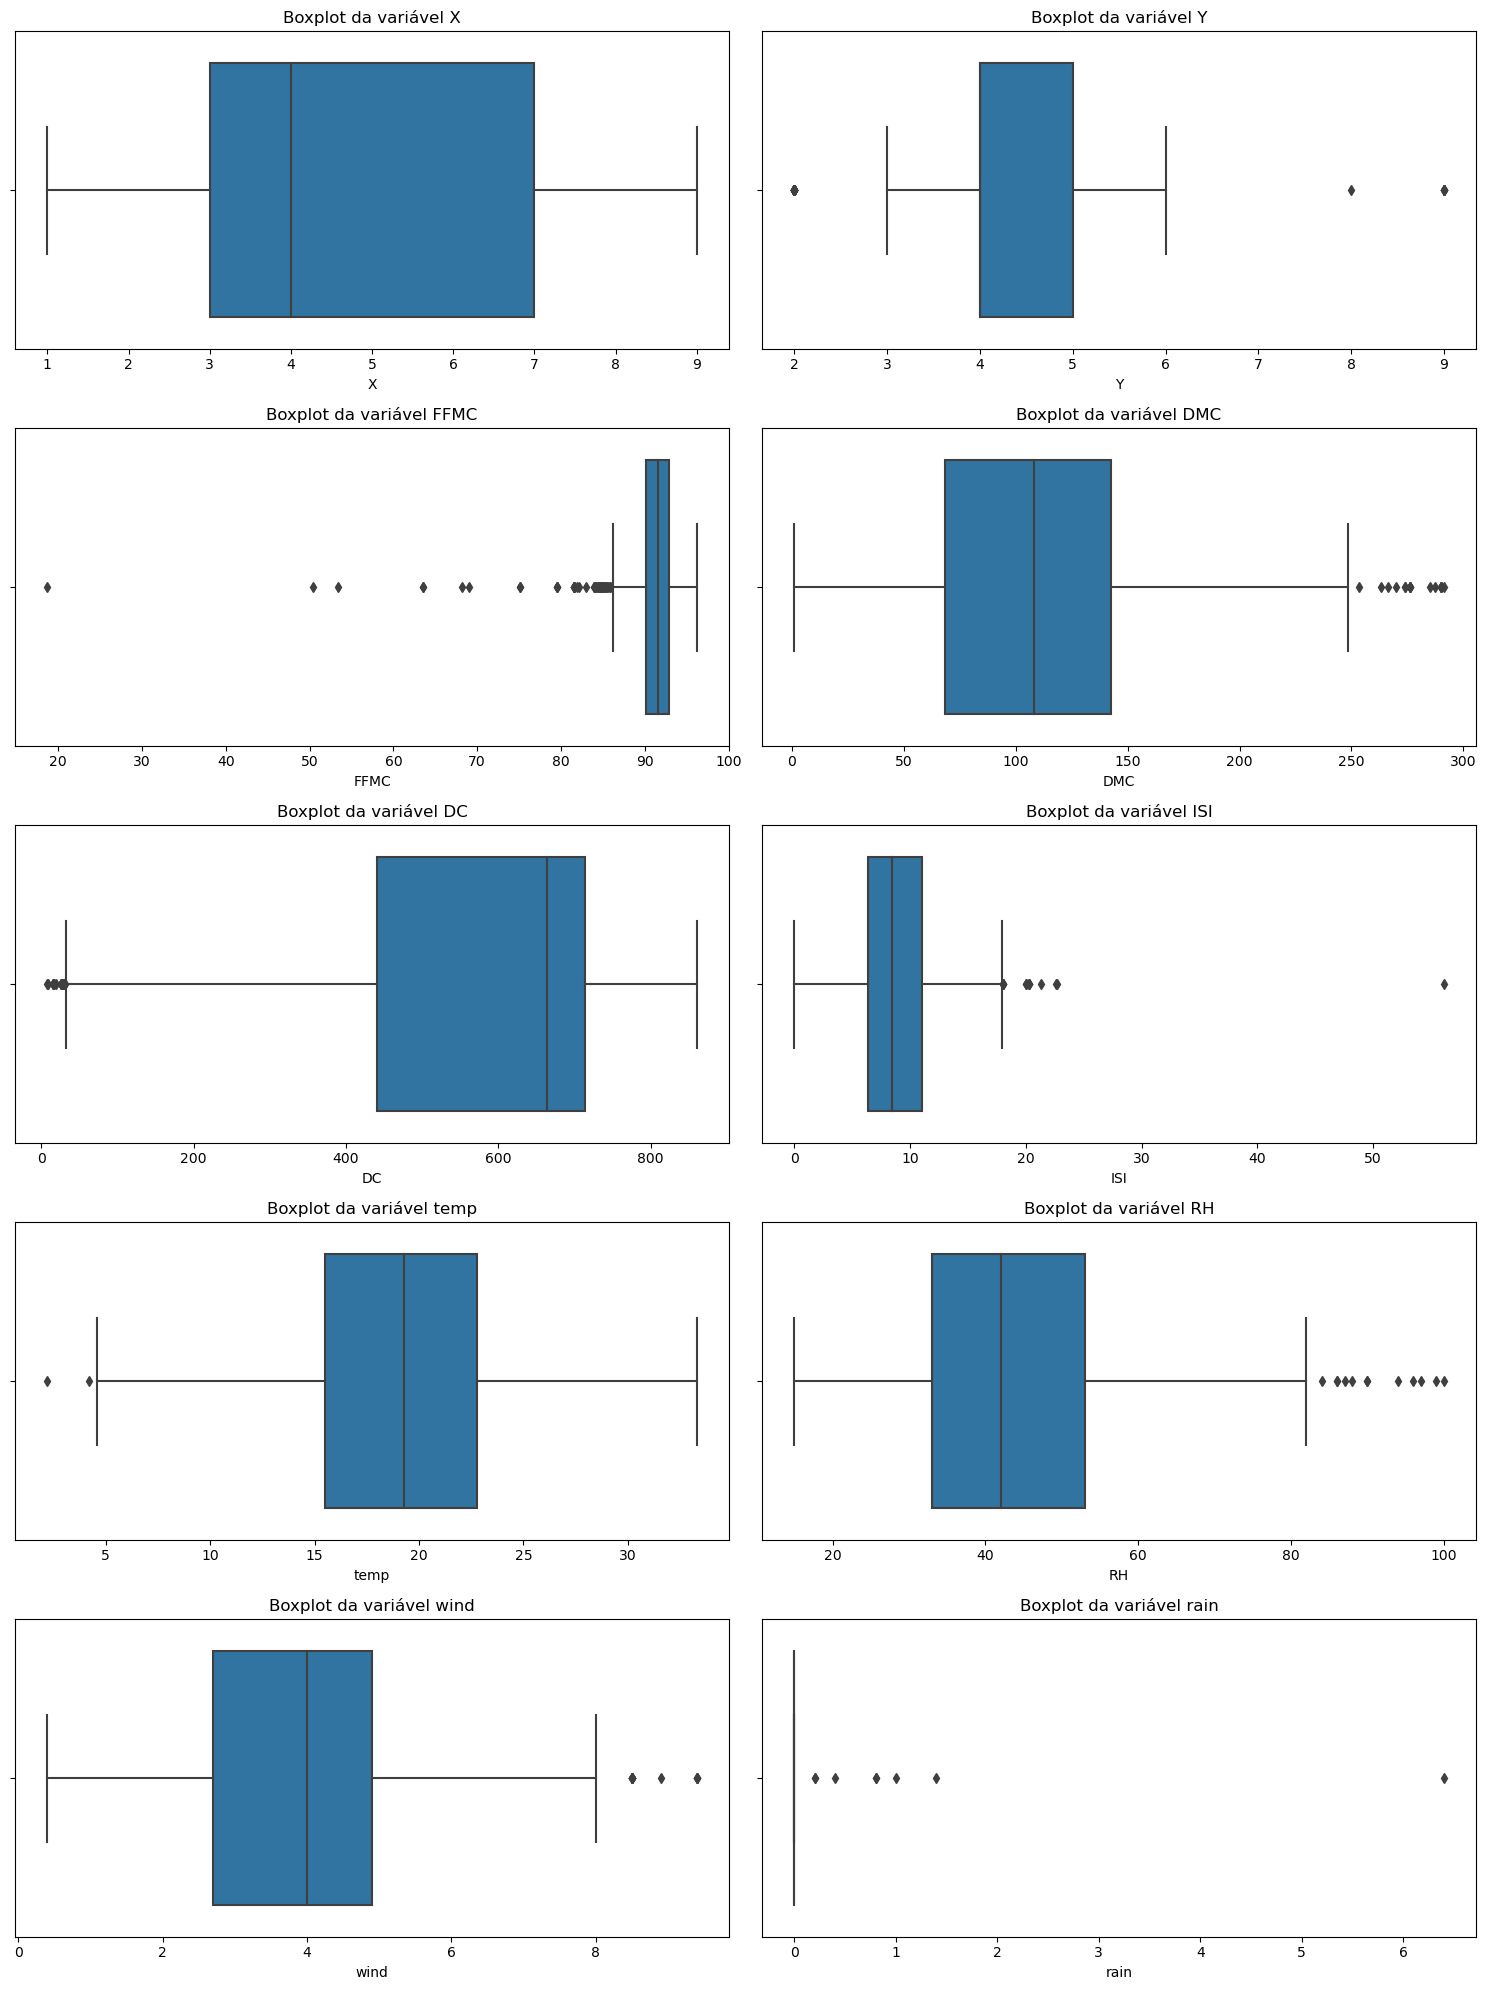

In [13]:
fig, axs =  plt.subplots(nrows = 5, ncols = 2, figsize=(15,20))
axs = np.ravel(axs)

colunas_cat = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain']

for i, col in enumerate(colunas_cat):
    plt.sca(axs[i])
    sns.boxplot(data = dados, x = col)
    plt.title(f'Boxplot da variável {col}')
    
plt.tight_layout() 
plt.show()

Vemos que fora a temperatura nenhuma das outras variáveis tem uma distribuição próxima da normal. Algumas delas como FFMC com clara assimetria à esquerda e ASIS com uma assimetria á direita. Outro ponto que podemos ver, através dos gráficos de dispersão, é que temos pouca relação linear entre as variáveis independentes com a variável dependente. Isso já nos trasmite o forte indício que uma regressão linear está fora de cogitação.

Com relação aos boxplots vemos a presença de outliers mas esses valores não parecem estar errados (valores negativos) e portanto não irei removê-los. Para minimizar o efeito desses outliers irei realizar uma trasnformação logaritmica nas variáveis FFMC, ISI e rain.

In [14]:
dados['log-FFMC'] = np.log1p(dados['FFMC'])
dados['log-ISI'] = np.log1p(dados['ISI'])
dados['log-rain'] = np.log1p(dados['rain'])

## Análises gráficas das variáveis independentes

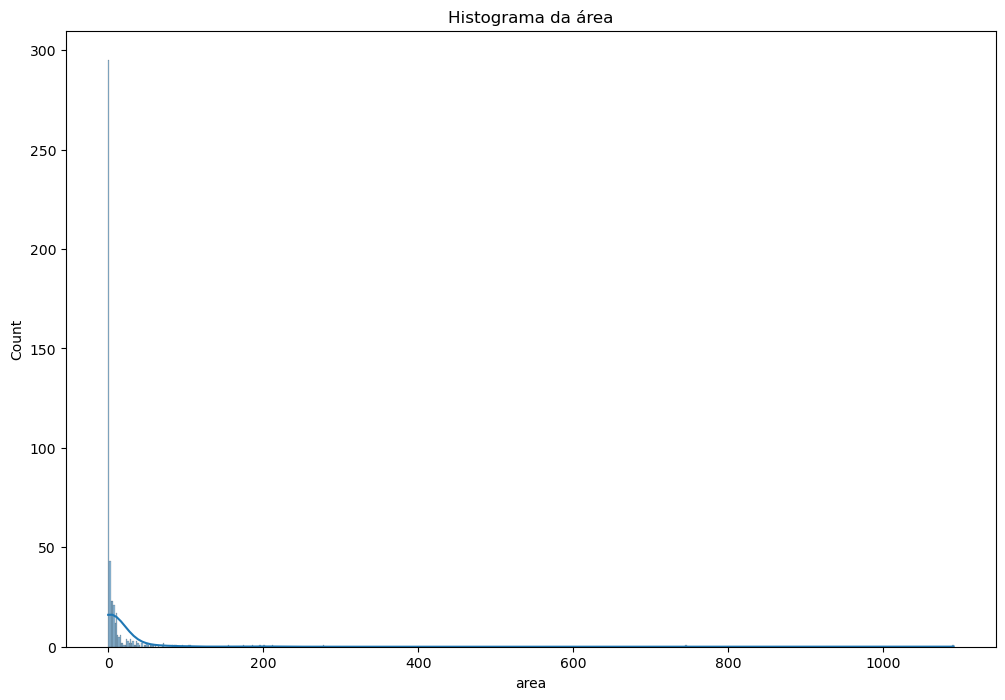

In [15]:
fig, ax = plt.subplots(figsize = (12, 8))
ax = sns.histplot(data = dados, x = 'area', kde = True)
plt.title('Histograma da área')
plt.show()

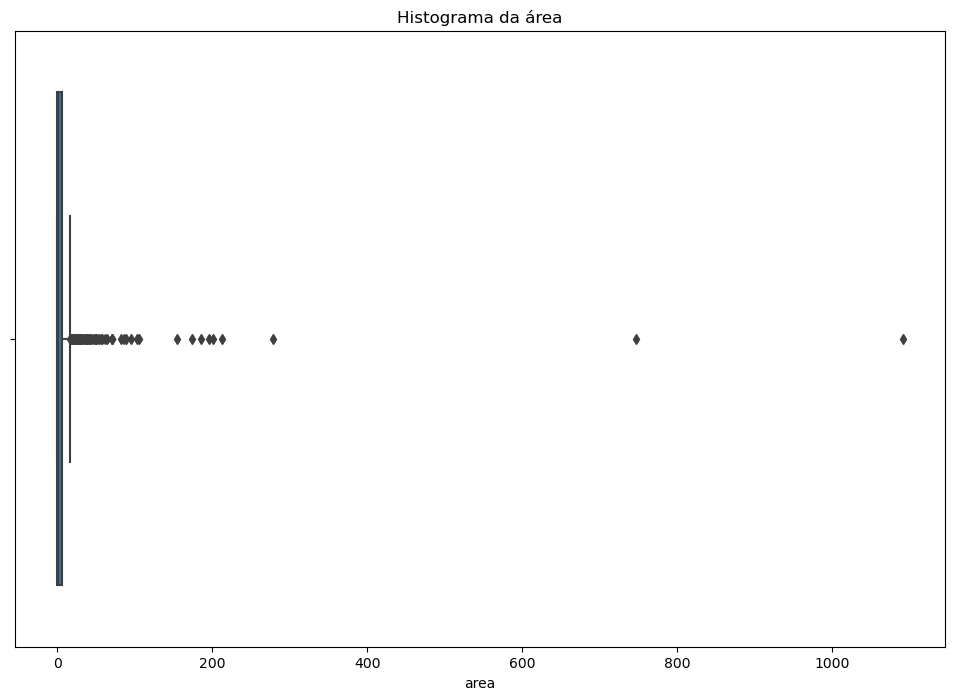

In [16]:
fig, ax = plt.subplots(figsize = (12, 8))
ax = sns.boxplot(data = dados, x = 'area')
plt.title('Histograma da área')
plt.show()

Vemos a presença de outliers, mas os mesmos não são erros (como valores negativos) e a natureza dos dados indica que a abordagem de removê-los seria equivocada. Desse modo vamos manter esses outliers.

Vemos uma grande concentração de valores 0 e uma distribuição com assimetria à direita. Isso nos induz a uma transformação logaritmica nos dados. Assim,  

In [17]:
dados['log-area'] = np.log10(dados['area'] + 1)

## Correlação entre as variáveis

Após a análise, vamos verificar a correlação entre as variáveis. Antes disso vamos transformar as variáveis categóricas em variáveis númericas.

In [18]:
dados_log = dados.copy()

In [19]:
dados_log = dados_log.drop(['area','FFMC','ISI','rain'], axis = 1)

In [20]:
dados_log = pd.get_dummies(dados_log, columns=['day','month'], drop_first = True, dtype = 'float')

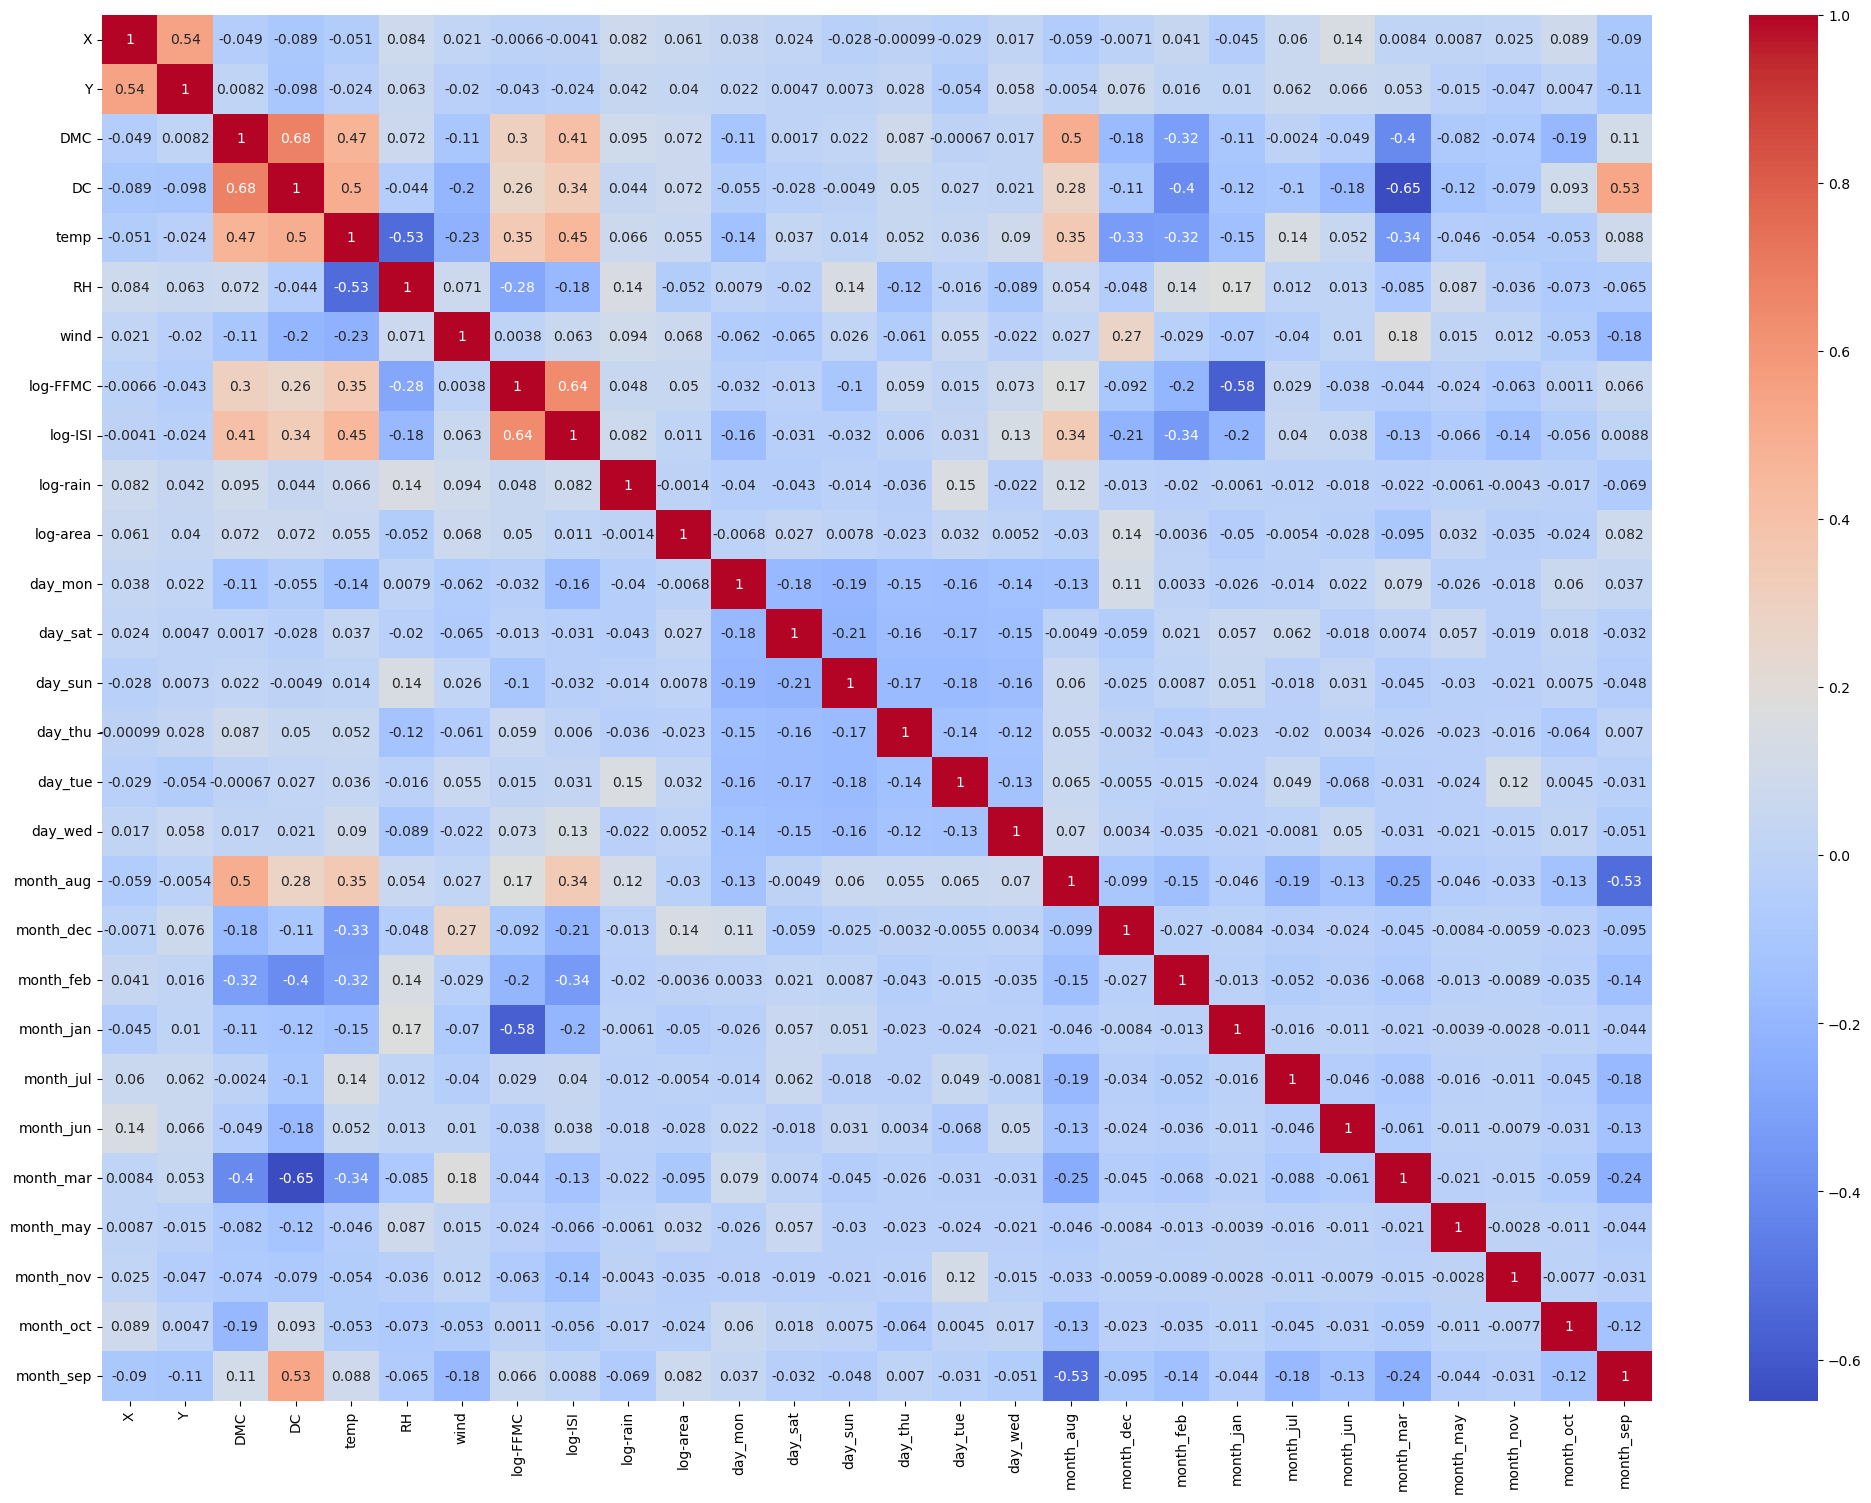

In [21]:
fig, ax = plt.subplots(figsize = (25, 18))
ax = sns.heatmap(dados_log.corr(), cmap = 'coolwarm', annot = True)

Vemos autocorrelação entre algumas variáveis como (month_mar e DC), (month_sep e DC) e (FFMC e month_jan). Essas autocorrelações podem ser prejudiciais para o nosso modelo e devemos olhar com cuidado para elas.

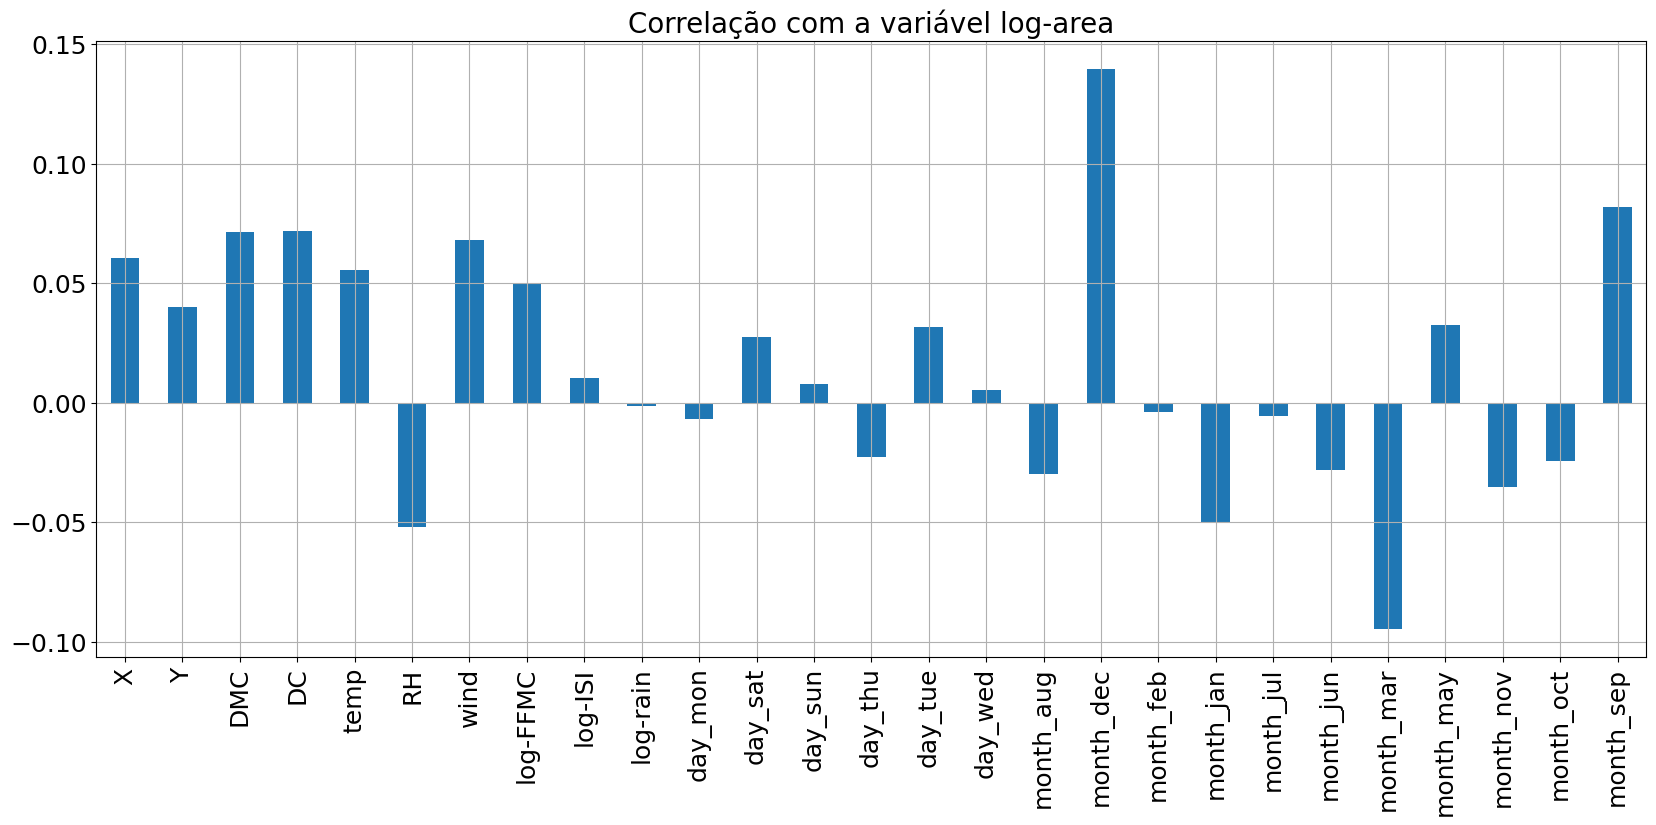

In [22]:
ax = dados_log.drop('log-area', axis = 1).corrwith(dados_log['log-area']).plot(kind = 'bar', grid = True, figsize = (20, 8), fontsize = 18)

ax.set_title('Correlação com a variável log-area', fontsize = 20)

plt.show()

Aqui vemos que as maiores correlações positivas são com os meses de setembro e dezembro e a maior correlação negativa com o mês de março. Além disso, vemos correlação positiva com as coordendas (X, Y) e alguns dos fatores meterológicos (FFMC, DMC, DC, temp, wind) e correlação negativa com RH.

# <font color='red' style='font-size: 30px;'>Construindo o modelo</font>
<hr style='border: 2px solid red;'>

In [24]:
X = dados_log.drop('log-area', axis = 1)
y = dados_log['log-area']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Random Forest Regressor

In [26]:
params = {
    'max_depth': [5, 10, 15, 20, 50], 
    'max_leaf_nodes': [2, 5, 10], 
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split':[2, 5, 10]
}

gs_rfr = GridSearchCV(RandomForestRegressor(random_state = 42), param_grid = params, refit = True, verbose = 0, cv = 5)

gs_rfr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 50],
                         'max_leaf_nodes': [2, 5, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [28]:
print(f'Melhores parâmetros para o Random Forest Regressor: {gs_rfr.best_params_}')

Melhores parâmetros para o Random Forest Regressor: {'max_depth': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [29]:
rmse = mean_squared_error(y_test, gs_rfr.predict(x_test), squared = False)

print(f'RMSE do Random Forest Regressor: {rmse}')

RMSE do Random Forest Regressor: 0.5607603136565351


#### Support Vector Machine 

In [30]:
params = [
    {'C': np.arange(1.0, 10.0, 1.0),
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
    },
    {
    'C': np.arange(1.0, 10.0, 1.0),
    'kernel': ['linear', 'sigmoid'],
    }
]
gs_svc = GridSearchCV(SVR(),param_grid = params, n_jobs = -1, cv = 10, 
                  verbose = 0)
gs_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
                          'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
                         {'C': array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
                          'kernel': ['linear', 'sigmoid']}])

In [31]:
print(f'Melhores parâmetros para o SVR: {gs_svc.best_params_}')

Melhores parâmetros para o SVR: {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}


In [32]:
rmse = mean_squared_error(y_test, gs_svc.predict(x_test), squared = False)

print(f'RMSE do SVR: {rmse}')

RMSE do SVR: 0.5804214693838141


#### XGBoost

In [33]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators = 100, learning_rate = 0.1, booster = 'gbtree',
                         verbosity = 0, nthread = -1,
                         random_state = 42)
params = {
    'min_child_weight': [None, 1, 5, 10],
    'gamma': [None, 0.1, 1, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [1, 2, 3, 4, 5]
}
gs_xg = GridSearchCV(xgb_model , param_grid = params, n_jobs = -1, cv = 5, 
                  verbose = 0)
gs_xg.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0....
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, nthread=-1,
                                    num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [None, 0.1, 1, 5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_child_weight': [None, 1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]})

In [34]:
print(f'Melhores parâmetros para o XGBoost: {gs_xg.best_params_}')

Melhores parâmetros para o XGBoost: {'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 1, 'min_child_weight': None, 'subsample': 0.6}


In [35]:
print("RMSE for XGBoost:",  np.sqrt(mean_squared_error(y_test, gs_xg.predict(x_test))))   

RMSE for XGBoost: 0.5641522128724636


#### Neural Networks

In [37]:
scaler = StandardScaler()

x_train_escalonado = scaler.fit_transform(x_train)
x_test_escalonado = scaler.fit_transform(x_test)

In [47]:
modelo = Sequential()

# Camada de entrada e primeira camada oculta com 100 neurônios
modelo.add(Dense(100, activation='relu', input_shape=(x_train_escalonado.shape[1],)))

# Segunda camada oculta com 150 neurônios
modelo.add(Dense(150, activation='relu'))

# Adicionando dropout para regularização
modelo.add(Dropout(0.3))

# Terceira camada oculta com 150 neurônios
modelo.add(Dense(150, activation='relu'))

# Quarta camada oculta com 150 neurônios
modelo.add(Dense(150, activation='relu'))

# Adicionando dropout para regularização
modelo.add(Dropout(0.3))

# Quinta camada oculta com 150 neurônios
modelo.add(Dense(150, activation='relu'))

# Camada de saída
modelo.add(Dense(1))

# Compilar o modelo
modelo.compile(optimizer = Adam(learning_rate = 0.01), loss = 'mean_squared_error', metrics = ['root_mean_squared_error'])

# Definindo o early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)

# Ajustando o modelo
historico = modelo.fit(x_train_escalonado, y_train, validation_split = 0.2, epochs = 500, 
                       callbacks=[early_stop], batch_size = 128)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 6.3902 - root_mean_squared_error: 2.3505 - val_loss: 0.6170 - val_root_mean_squared_error: 0.7855
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7625 - root_mean_squared_error: 0.8729 - val_loss: 0.4574 - val_root_mean_squared_error: 0.6763
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6606 - root_mean_squared_error: 0.8112 - val_loss: 0.4381 - val_root_mean_squared_error: 0.6619
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5037 - root_mean_squared_error: 0.7096 - val_loss: 0.3940 - val_root_mean_squared_error: 0.6277
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5066 - root_mean_squared_error: 0.7117 - val_loss: 0.3447 - val_root_mean_squared_error: 0.5871
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4711 - root_mean_squared_error: 0.6861 - val_loss: 0.3441 - val_root_mean_squared_error: 0.5866
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.402

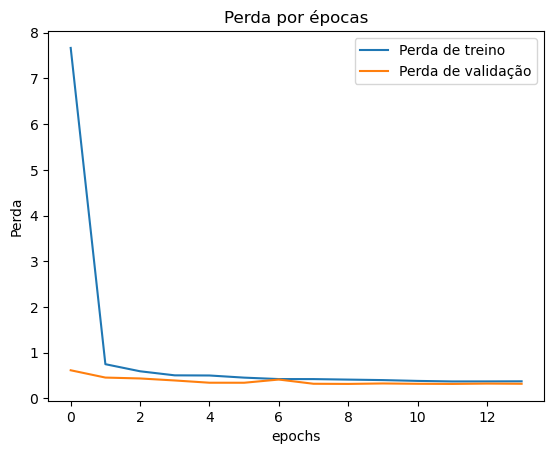

In [48]:
plt.plot(historico.history['loss'], label = 'Perda de treino')
plt.plot(historico.history['val_loss'], label = 'Perda de validação')
plt.title('Perda por épocas')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Perda')
plt.show()

In [49]:
print("RMSE for NN:",  np.sqrt(mean_squared_error(y_test, modelo.predict(x_test_escalonado))))   

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
RMSE for NN: 0.5582748772395598


In [50]:
resultados_modelos = pd.DataFrame(
{
    'Modelos': ['Random Forest Regressor', 'Support Vector Machine','XGBoost Regressor' ,'Neural Network'],
    'RMSE' : [mean_squared_error(y_test, gs_rfr.predict(x_test), squared = False), 
              mean_squared_error(y_test, gs_svc.predict(x_test), squared = False),  
              mean_squared_error(y_test, gs_xg.predict(x_test), squared = False), 
              mean_squared_error(y_test, modelo.predict(x_test_escalonado), squared = False)]
})
resultados_modelos.sort_values(by = 'RMSE', ascending = True, inplace = True)

resultados_modelos.reset_index(inplace = True, drop = True)

resultados_modelos

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Modelos,RMSE
0,Neural Network,0.558275
1,Random Forest Regressor,0.560760
2,XGBoost Regressor,0.564152
3,Support Vector Machine,0.580421


# <font color='red' style='font-size: 30px;'>Conclusão</font>
<hr style='border: 2px solid red;'>

Neste projeto, foram aplicadas técnicas de regressão para previsão da área queimada em incêndios floretais. Após uma breve análise exploratória de dados foram feitos diferentes modelos de regressão na busca pelo melhor modelo para nossa métrica de análise. O modelo com melhor desempenho (menor RMSE) foi a rede neural construída com 8 camadas no total sendo 5 camadas densas (contando a de entrada e a de saída), 2 camadas de Dropout e a camada de entrada especificada pelo argumento input_shape = 27.